In [1]:
# N_0 Lambda Code --> eventually move key parts to py_files
# Jack Richter
# May 15th, 2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import netCDF4 as nc
import sys
import glob

sys.path.insert(1, '/home/jrichter/python/mqt/py_files')
from pip_tools_original_JackCopy import open_dist_data
from histogram import *

from scipy.optimize import curve_fit
from N0_Lambda_helpers import get_N0_lambdas

In [3]:
AR_N0_array, AR_lambda_array = get_N0_lambdas("/home/jrichter/python/mqt/txt_files/MQT_ARs_Snow.txt")

Deep_N0_array, Deep_lambda_array = get_N0_lambdas("/home/jrichter/python/mqt/txt_files/Deep_NoAR_list.txt")

No File 20221215
No File 20221207
No File 20221211


In [4]:
bin_N0 = np.arange(0, 6.2, 0.2)
bin_lambda = np.arange(-1, 1.05, 0.05)

AR_N0_lambda_hist = np.histogram2d(np.ma.log10(AR_lambda_array), np.ma.log10(AR_N0_array), (bin_lambda,bin_N0), normed=False)
Deep_N0_lambda_hist = np.histogram2d(np.ma.log10(Deep_lambda_array), np.ma.log10(Deep_N0_array), (bin_lambda,bin_N0), normed=False)

AR_N0_lambda_hist_normed = np.histogram2d(np.ma.log10(AR_lambda_array), np.ma.log10(AR_N0_array), (bin_lambda,bin_N0), normed=True)
Deep_N0_lambda_hist_normed = np.histogram2d(np.ma.log10(Deep_lambda_array), np.ma.log10(Deep_N0_array), (bin_lambda,bin_N0), normed=True)

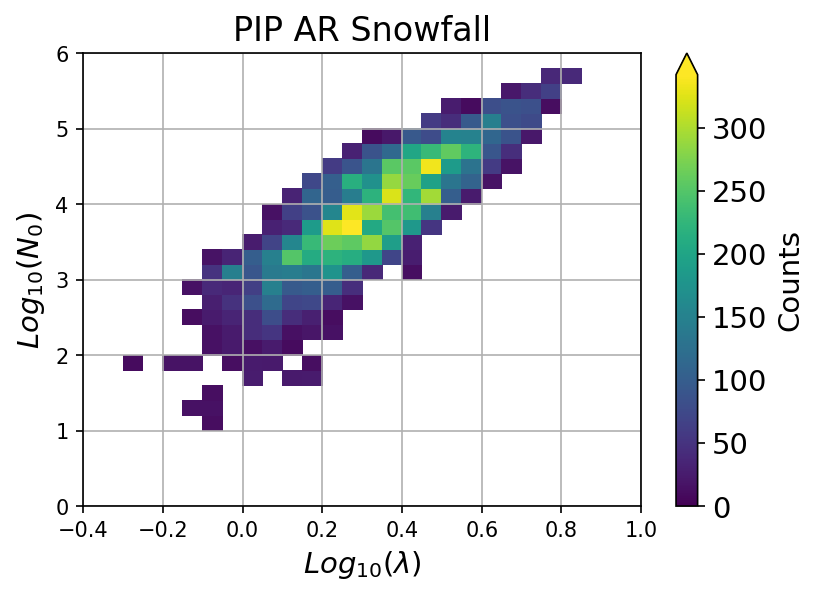

In [5]:
plt.figure(dpi=150)
plt.pcolormesh(bin_lambda, bin_N0, np.ma.masked_less(AR_N0_lambda_hist[0].T, 10), vmin=0, cmap="viridis")
plt.xlim(-0.4,1.0)
plt.ylim(0,6)
plt.title("PIP AR Snowfall", size=16)
plt.ylabel("$Log_{10}(N_{0})$", size=14)
plt.xlabel("$Log_{10}(λ)$", size=14)
cb = plt.colorbar(label = 'counts', extend="max")
cb.set_label(label="Counts", size=14)
cb.ax.tick_params(labelsize=14) 
plt.grid()
#plt.savefig("/home/jrichter/python/mqt/N0_lambda_AR.png", bbox_inches=None, pad_inches=0.1)
plt.show()

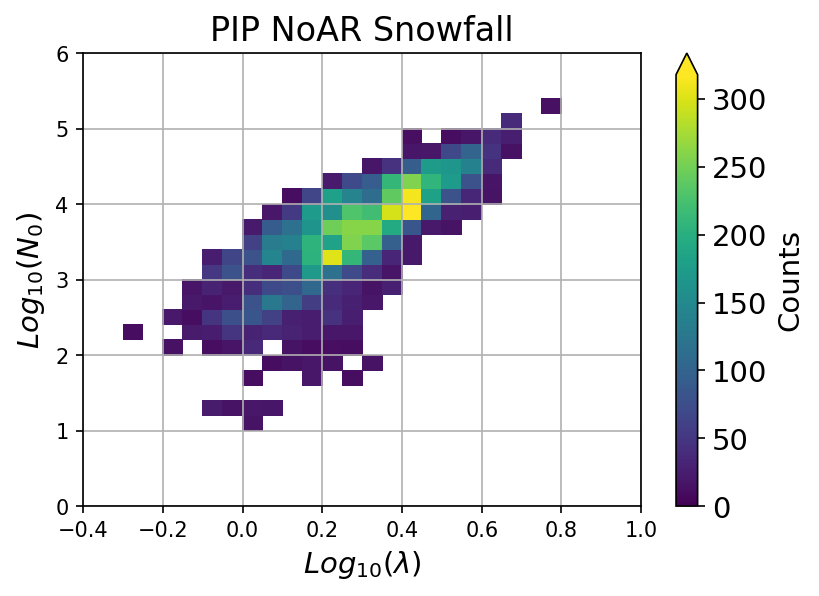

In [6]:
plt.figure(dpi=150)
plt.pcolormesh(bin_lambda, bin_N0, np.ma.masked_less(Deep_N0_lambda_hist[0].T, 10), vmin=0, cmap="viridis")
plt.xlim(-0.4,1.0)
plt.ylim(0,6)
plt.title("PIP NoAR Snowfall", size=16)
plt.ylabel("$Log_{10}(N_{0})$", size=14)
plt.xlabel("$Log_{10}(λ)$", size=14)
cb = plt.colorbar(label = 'counts', extend="max")
cb.set_label(label="Counts", size=14)
cb.ax.tick_params(labelsize=14) 
plt.grid()
#plt.savefig("/home/jrichter/python/mqt/N0_lambda_Deep.png", bbox_inches=None, pad_inches=0.1)
plt.show()

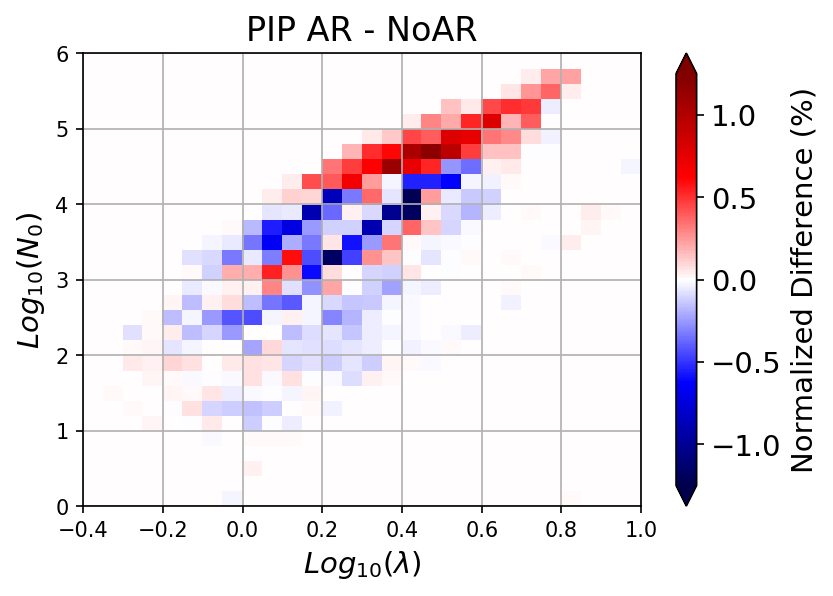

In [7]:
plt.figure(dpi=150)
plt.pcolormesh(bin_lambda, bin_N0, ((AR_N0_lambda_hist[0].T/np.sum(AR_N0_lambda_hist[0].T))-(Deep_N0_lambda_hist[0].T/np.sum(Deep_N0_lambda_hist[0].T)))*100, cmap="seismic", vmax=1.25, vmin=-1.25)
plt.xlim(-0.4,1.0)
plt.ylim(0,6)
plt.title("PIP AR - NoAR", size=16)
plt.ylabel("$Log_{10}(N_{0})$", size=14)
plt.xlabel("$Log_{10}(λ)$", size=14)
cb = plt.colorbar(label = 'counts', extend="both")
cb.set_label(label="Normalized Difference (%)", size=14)
cb.ax.tick_params(labelsize=14) 
plt.grid()
#plt.savefig("/home/jrichter/python/mqt/N0_lambda_diff.png", bbox_inches=None, pad_inches=0.1)
plt.show()

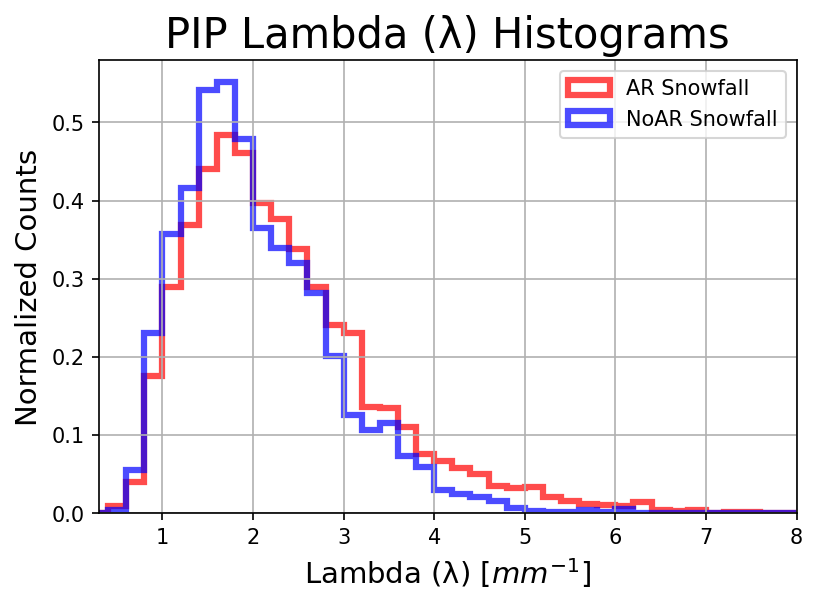

In [8]:
plt.figure(dpi=150)
bin_lambda = np.arange(0, 10, 0.2)
plt.hist(AR_lambda_array, bins=bin_lambda, normed=True, histtype='step', alpha=0.7, color="red", linewidth=3.0, label="AR Snowfall")
plt.hist(Deep_lambda_array, bins=bin_lambda, normed=True, histtype='step', alpha=0.7, color="blue", linewidth=3.0, label="NoAR Snowfall")
plt.title("PIP Lambda (λ) Histograms", size=20)
plt.xlim(0.3, 8)
plt.xlabel("Lambda (λ) [$mm^{-1}$]", size=14)
plt.ylabel("Normalized Counts", size=14)
plt.grid()
plt.legend()
#plt.savefig("/home/jrichter/python/mqt/Lambda_histograms_normed.png", bbox_inches=None, pad_inches=0.1)
plt.show()

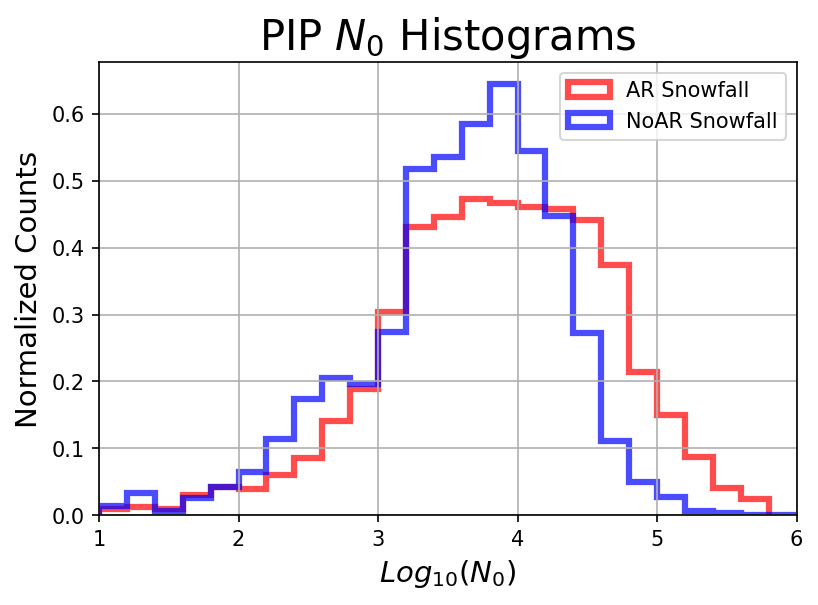

In [9]:
plt.figure(dpi=150)
bin_N0 = np.arange(0.0, 6, 0.2)
plt.hist(np.ma.log10(AR_N0_array), bins=bin_N0, normed=True, histtype='step', alpha=0.7, color="red", linewidth=3.0, label="AR Snowfall")
plt.hist(np.ma.log10(Deep_N0_array), bins=bin_lambda, normed=True, histtype='step', alpha=0.7, color="blue", linewidth=3.0, label="NoAR Snowfall")
plt.title("PIP $N_0$ Histograms", size=20)
plt.xlabel("$Log_{10}(N_0)$", size=14)
plt.ylabel("Normalized Counts", size=14)
plt.xlim(1, 6)
plt.grid()
plt.legend()
#plt.savefig("/home/jrichter/python/mqt/N0_histograms_normed.png", bbox_inches=None, pad_inches=0.1)
plt.show()

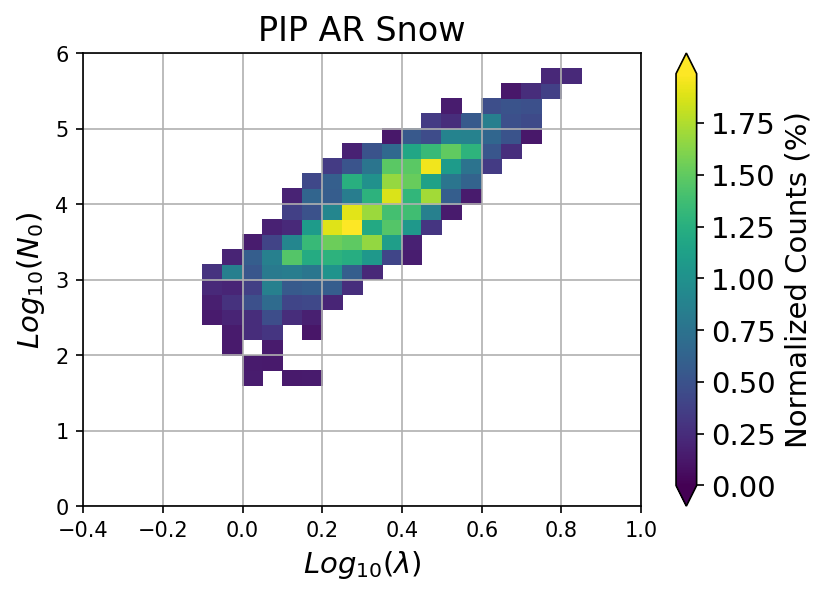

In [18]:
bin_N0 = np.arange(0, 6.2, 0.2)
bin_lambda = np.arange(-1, 1.05, 0.05)

plt.figure(dpi=150)
plt.pcolormesh(bin_lambda, bin_N0, np.ma.masked_less((AR_N0_lambda_hist[0].T/np.sum(AR_N0_lambda_hist[0].T))*100, 0.1), cmap="viridis", vmin=0)
plt.xlim(-0.4,1.0)
plt.ylim(0,6)
plt.title("PIP AR Snow", size=16)
plt.ylabel("$Log_{10}(N_{0})$", size=14)
plt.xlabel("$Log_{10}(λ)$", size=14)
cb = plt.colorbar(label = 'counts', extend="both")
cb.set_label(label="Normalized Counts (%)", size=14)
cb.ax.tick_params(labelsize=14) 
plt.grid()
#plt.savefig("/home/jrichter/python/mqt/AR_N0_lambda_normed.png", bbox_inches=None, pad_inches=0.1)
plt.show()

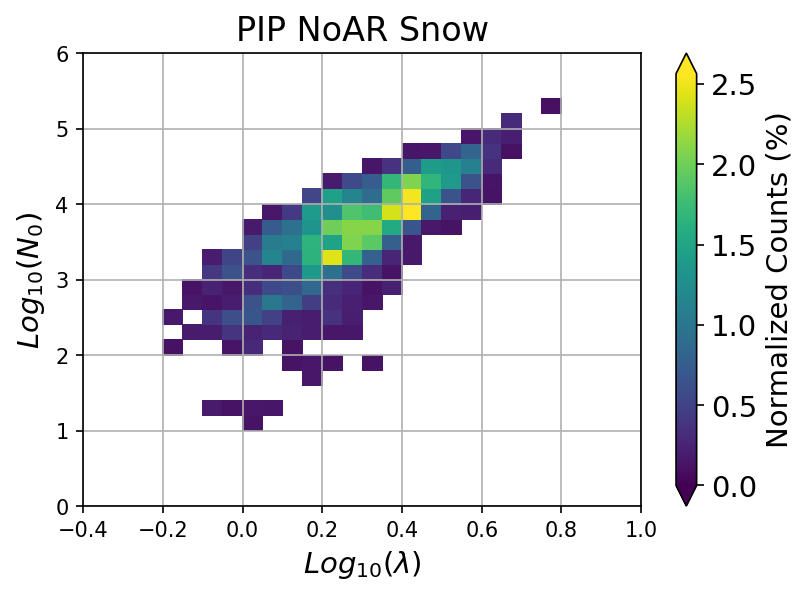

In [19]:
bin_N0 = np.arange(0, 6.2, 0.2)
bin_lambda = np.arange(-1, 1.05, 0.05)

plt.figure(dpi=150)
plt.pcolormesh(bin_lambda, bin_N0, np.ma.masked_less((Deep_N0_lambda_hist[0].T/np.sum(Deep_N0_lambda_hist[0].T))*100, 0.1), cmap="viridis", vmin=0)
plt.xlim(-0.4,1.0)
plt.ylim(0,6)
plt.title("PIP NoAR Snow", size=16)
plt.ylabel("$Log_{10}(N_{0})$", size=14)
plt.xlabel("$Log_{10}(λ)$", size=14)
cb = plt.colorbar(label = 'counts', extend="both")
cb.set_label(label="Normalized Counts (%)", size=14)
cb.ax.tick_params(labelsize=14) 
plt.grid()
#plt.savefig("/home/jrichter/python/mqt/AR_N0_lambda_normed.png", bbox_inches=None, pad_inches=0.1)
plt.show()